<a href="https://colab.research.google.com/github/victoria-uriostegui/Pairs-Trading-Repo-ED-VU-Fall-24-/blob/wip-victoria/pairs_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **Libraries**

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

# Adding Dates

In [2]:
# Set start date variable as start date for historical data (9/20/23)
start_date = dt.datetime(2023, 9, 20)

# Set end date variable as end date for historical data (9/20/24)
end_date = dt.datetime(2024, 9, 20)

# List of Stocks


In [3]:
# List of stocks(car companies):
# Telsa, BMW, Subaru, Porshe, Honda, Kia, Mzada, Toyota, Hyundai, Chargepoint, EVgo, Blink, Wallbox, Sunpower
stocks = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF', 'CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ']

# Download stock data INCLUDING ADJ Close price
stocks_df = yf.download(stocks, start=start_date, end = end_date, auto_adjust = False)

# Dropping everything, but ADJ close price
stocks_df.drop(columns = ['Open', 'High', 'Low','Close', 'Volume'], axis = 1, inplace = True)

# Cleaned dataframe by dropped unnecessary words
stocks_df = stocks_df.droplevel(0, axis = 1)
display(stocks_df)

[*********************100%***********************]  14 of 14 completed


Ticker,BLNK,BMWKY,CHPT,DRPRY,EVGO,FUJHY,HMC,HYMTF,KS,MZDAY,SPWRQ,TM,TSLA,WBX
Date,,,,,,,,,,,,,,
2023-09-20,3.49,33.342468,5.18,9.687654,3.80,10.16,35.519745,37.490711,0.035,6.08,6.8400,188.750000,262.589996,2.47
2023-09-21,3.14,33.106934,5.09,9.542340,3.65,9.97,34.644779,36.035679,0.035,5.97,6.6200,186.300003,255.699997,2.27
2023-09-22,3.14,33.012718,5.02,9.484214,3.59,10.02,34.634945,36.035679,0.030,6.05,6.3700,187.100006,244.880005,2.17
2023-09-25,2.95,32.532223,4.92,9.522964,3.52,9.88,34.615284,37.471813,0.035,6.00,6.1000,184.839996,246.990005,2.34
2023-09-26,2.93,31.900990,4.85,9.183896,3.32,9.81,34.143391,37.018299,0.030,5.96,6.0800,180.500000,244.119995,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,1.84,26.990000,1.37,7.360000,4.48,8.52,31.469999,64.680000,0.020,3.71,0.0200,175.389999,230.289993,1.32
2024-09-16,1.79,27.020000,1.37,7.480000,4.35,8.62,31.600000,66.599998,0.020,3.70,0.0200,176.229996,226.779999,1.25
2024-09-17,1.88,26.900000,1.51,7.450000,4.70,8.40,31.480000,65.459999,0.020,3.71,0.0190,173.149994,227.869995,1.26


# Pearson Method Correlation Test

In [4]:

# Create a correlation matrix using panda's corr() method with the Pearson correlation method
correlation_matrix = stocks_df.corr(method='pearson')

# Iterate through the columns and replace the diagonal values (correlation = 1) with 0 in order to get the actual max correlation values
np.fill_diagonal(correlation_matrix.values, 0)
display(correlation_matrix)


Ticker,BLNK,BMWKY,CHPT,DRPRY,EVGO,FUJHY,HMC,HYMTF,KS,MZDAY,SPWRQ,TM,TSLA,WBX
Ticker,,,,,,,,,,,,,,
BLNK,0.000000,0.405142,0.351757,0.331390,-0.117251,0.162248,0.017109,-0.300062,0.290407,0.395347,0.581677,0.116725,0.250627,0.344601
BMWKY,0.405142,0.000000,-0.073685,0.633414,-0.505706,0.697096,0.676541,-0.010985,0.661199,0.716673,0.313679,0.788402,-0.387358,0.107421
CHPT,0.351757,-0.073685,0.000000,0.379204,0.207039,-0.278852,-0.007412,-0.646346,-0.111234,0.265219,0.702111,-0.390152,0.570388,0.841907
DRPRY,0.331390,0.633414,0.379204,0.000000,-0.390296,0.279617,0.587796,-0.433553,0.467168,0.695269,0.570282,0.416091,-0.110070,0.387821
EVGO,-0.117251,-0.505706,0.207039,-0.390296,0.000000,-0.627901,-0.473341,0.099303,-0.502027,-0.573347,-0.278346,-0.598407,0.673716,0.129238
FUJHY,0.162248,0.697096,-0.278852,0.279617,-0.627901,0.000000,0.800146,0.419159,0.371710,0.490806,-0.023944,0.905722,-0.620076,-0.230267
HMC,0.017109,0.676541,-0.007412,0.587796,-0.473341,0.800146,0.000000,0.226605,0.270199,0.585244,0.067111,0.841443,-0.541657,0.005089
HYMTF,-0.300062,-0.010985,-0.646346,-0.433553,0.099303,0.419159,0.226605,0.000000,-0.169955,-0.486837,-0.806695,0.407917,-0.440203,-0.650870
KS,0.290407,0.661199,-0.111234,0.467168,-0.502027,0.371710,0.270199,-0.169955,0.000000,0.483484,0.336623,0.440176,-0.314958,0.147844


### Correlation Heat Matrix

<Axes: xlabel='Ticker', ylabel='Ticker'>

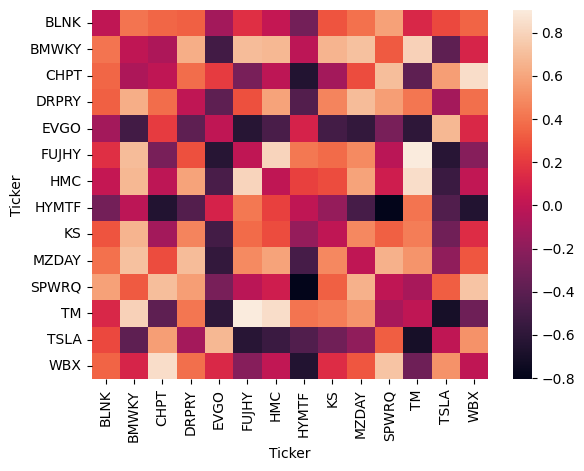

In [5]:
# Displaying correlation_matrix and interate through
display(sns.heatmap(correlation_matrix))

### Correlation Max Values

In [6]:
# Get top 3 pairs with highest correlation
# Using indexed column dataframe in highest to lowest order
top_pairs = correlation_matrix.unstack().sort_values(ascending=False)[:3*2]

# Holding unique pairs in list without duplicates
unique_pairs = []

# If pair is not duplicate and is not in stack, append to unqiue pairs list
for pair in top_pairs.index:
    if pair[0] != pair[1] and (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.append(pair)

# Column Names
top_pairs_df = pd.DataFrame(columns=['Stock 1', 'Stock 2', 'Corr Coeff'])

# Iterating and adding top 3 unqiue pairs to top pairs
for i, pair in enumerate(unique_pairs[:3]):
  # Creating data frame with pair 0, pair 1, and locating corr coeff
    top_pairs_df.loc[i] = [pair[0], pair[1], correlation_matrix.loc[pair[0], pair[1]]]

# Print
display(top_pairs_df)

,Stock 1,Stock 2,Corr Coeff
0,TM,FUJHY,0.905722
1,CHPT,WBX,0.841907
2,HMC,TM,0.841443


# Chose Stocks Toyota(TM) & Subaru(FUJHY)

In [7]:
# Dropped all data besides Toyota and Subaru at columns
tmsub_df = stocks_df.drop(columns = ['BLNK', 'BMWKY', 'CHPT', 'DRPRY', 'EVGO', 'HMC', 'HYMTF', 'KS', 'MZDAY', 'SPWRQ','TSLA', 'WBX'], axis = 1)
display(tmsub_df)

# Make a copy of the tmsub_df for future use
tmsub_og = tmsub_df.copy()


Ticker,FUJHY,TM
Date,,
2023-09-20,10.16,188.750000
2023-09-21,9.97,186.300003
2023-09-22,10.02,187.100006
2023-09-25,9.88,184.839996
2023-09-26,9.81,180.500000
...,...,...
2024-09-13,8.52,175.389999
2024-09-16,8.62,176.229996
2024-09-17,8.40,173.149994


## Plotting Subplot

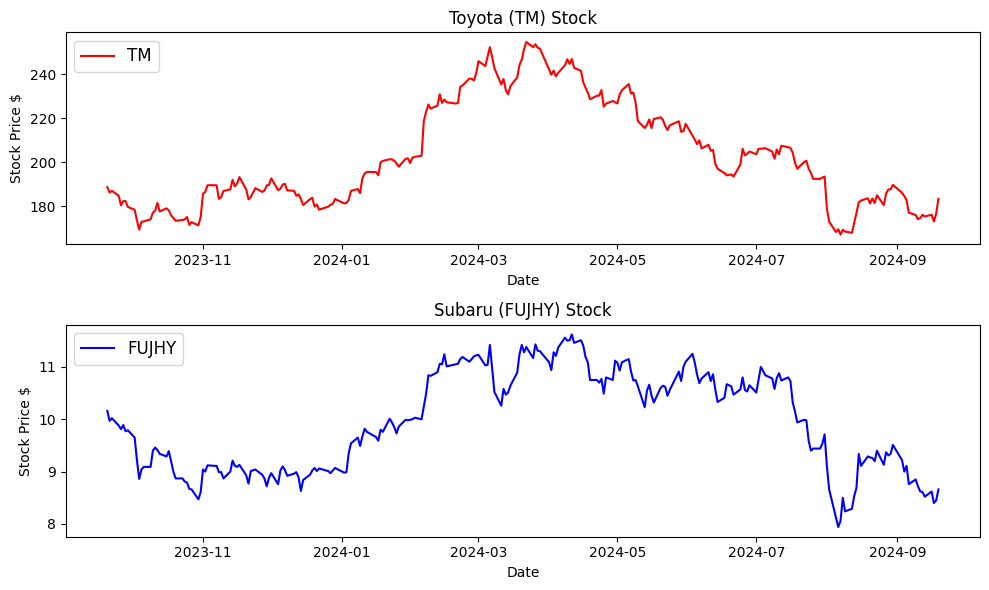

In [8]:
# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(2, 1, figsize = (10, 6))

# Plotting TM (Toyota stock) in the second subplot (row 1)
axs[0].plot(tmsub_df['TM'], color = 'red', label = 'TM')
axs[0].set_title("Toyota (TM) Stock")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Stock Price $")

# Adding legend to Toyota subplot
axs[0].legend(fontsize=12, loc='upper left')


# Plotting FUJHY (Subaru stock) in the first subplot (row 0)
axs[1].plot(tmsub_df['FUJHY'], color='blue', label='FUJHY')
axs[1].set_title("Subaru (FUJHY) Stock")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Stock Price $")
axs[1].legend(fontsize = 12, loc = 'upper left')


# Adding legend to the Subaru subplot
axs[1].legend(fontsize = 12, loc = 'upper left')

# Adjust readability
plt.tight_layout()
plt.show()

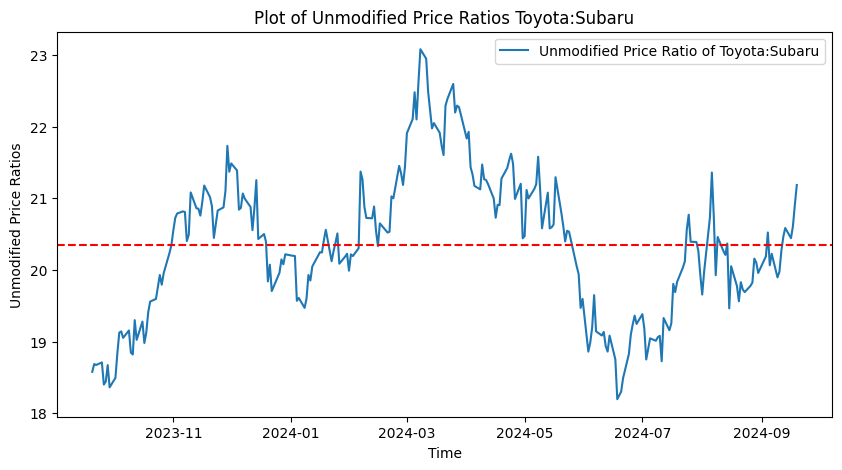

In [9]:
# Visualizing the data with a price ratio graph to determine their relation.
price_ratios = tmsub_df['TM'] / tmsub_df['FUJHY']

# Plot the unmodified price ratios.
plt.figure(figsize=(10, 5))
plt.plot(price_ratios, label="Unmodified Price Ratio of Toyota:Subaru")
plt.axhline(y=price_ratios.mean(), color="red", linestyle="--")  # Horizontal line at zero
plt.autoscale(False)
plt.title("Plot of Unmodified Price Ratios Toyota:Subaru")
plt.xlabel("Time")
plt.ylabel("Unmodified Price Ratios")
plt.legend()
plt.show()


# Engle-Granger Cointergration Test


### Converting to Natural Logarthimic Price

In [10]:
tmsub_df = np.log(tmsub_df)
display(tmsub_df)

Ticker,FUJHY,TM
Date,,
2023-09-20,2.318458,5.240423
2023-09-21,2.299581,5.227358
2023-09-22,2.304583,5.231643
2023-09-25,2.290513,5.219491
2023-09-26,2.283402,5.195731
...,...,...
2024-09-13,2.142416,5.167012
2024-09-16,2.154085,5.171790
2024-09-17,2.128232,5.154158


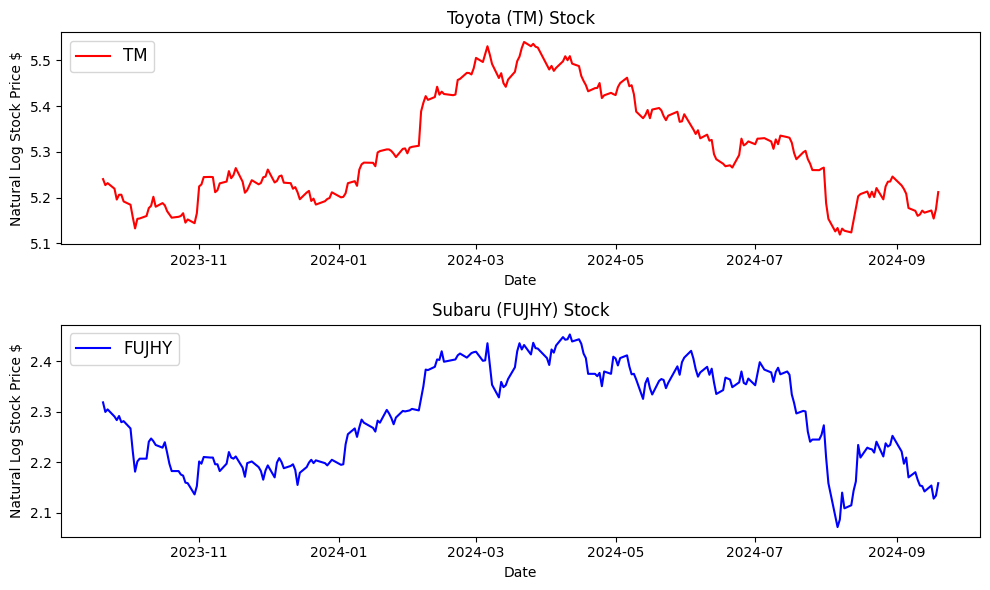

In [11]:
# Making graph
# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(2, 1, figsize = (10, 6))

# Plotting TM (Toyota stock) in the second subplot (row 1)
axs[0].plot(tmsub_df['TM'], color = 'red', label = 'TM')
axs[0].set_title("Toyota (TM) Stock")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Natural Log Stock Price $")

# Adding legend to Toyota subplot
axs[0].legend(fontsize=12, loc='upper left')


# Plotting FUJHY (Subaru stock) in the first subplot (row 0)
axs[1].plot(tmsub_df['FUJHY'], color='blue', label='FUJHY')
axs[1].set_title("Subaru (FUJHY) Stock")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Natural Log Stock Price $")
axs[1].legend(fontsize = 12, loc = 'upper left')


# Adding legend to the Subaru subplot
axs[1].legend(fontsize = 12, loc = 'upper left')

# Adjust readability
plt.tight_layout()
plt.show()

### Implementing Ordinary Least Squares

Scatterplot TM vs FUJHY using TM as dependent variable

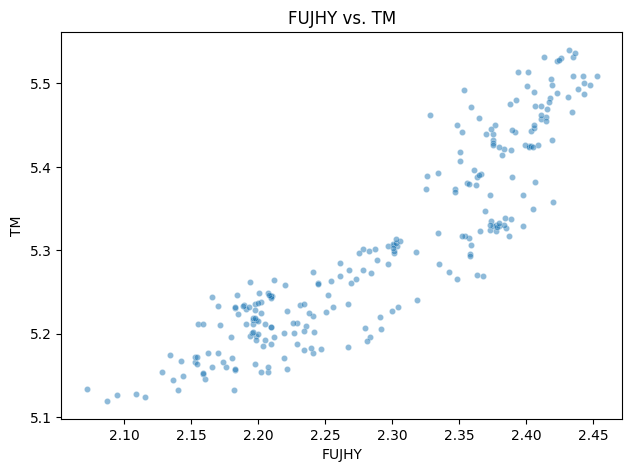

In [12]:
plt.figure()
sns.scatterplot(data = tmsub_df, x = 'FUJHY', y = 'TM', alpha = 0.5, s = 20)
plt.title('FUJHY vs. TM')
plt.xlabel('FUJHY')
plt.ylabel('TM')
plt.tight_layout(pad=1.0)
plt.show()

### Results

In [13]:
Y = tmsub_df['TM']
X = tmsub_df['FUJHY']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1185.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           7.66e-97
Time:                        04:23:55   Log-Likelihood:                 407.92
No. Observations:                 252   AIC:                            -811.8
Df Residuals:                     250   BIC:                            -804.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8021      0.073     38.510      0.0

### OLS Best Fitted Line

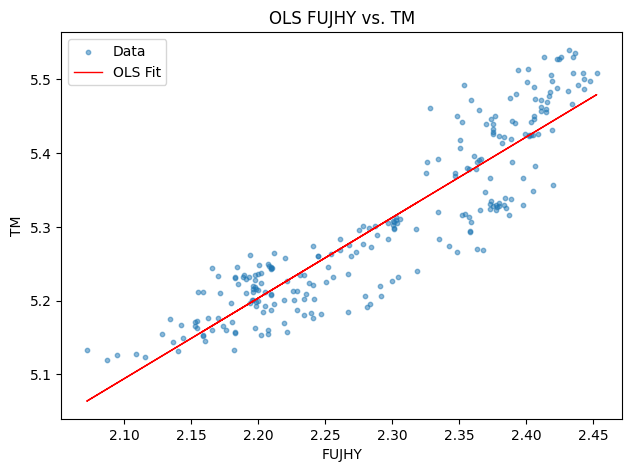

In [14]:
# Plot showing OLS results adjusting size and linewidth
plt.scatter(X['FUJHY'], Y, label = 'Data', alpha = 0.5, s = 10)
plt.plot(X['FUJHY'], result.predict(X), color = 'red', label = 'OLS Fit', linewidth = 1)
plt.title('OLS FUJHY vs. TM')
plt.xlabel('FUJHY')
plt.ylabel('TM')

# Making graph more legiable
plt.tight_layout(pad = 1.0)
plt.legend()

plt.show()


### Implementing Augmented Dicky-Fuller Test

In [15]:
# Using Zt(fitted values) for ADF test
Zt = result.resid
print(Zt)

Date
2023-09-20   -0.092459
2023-09-21   -0.084918
2023-09-22   -0.086093
2023-09-25   -0.082887
2023-09-26   -0.098886
                ...   
2024-09-13    0.026290
2024-09-16    0.018331
2024-09-17    0.028920
2024-09-18    0.042794
2024-09-19    0.053539
Length: 252, dtype: float64


In [16]:
adf_test = sm.tsa.adfuller(Zt)
print("P-value:", adf_test[1])

P-value: 0.08444085435483395


With P-value < 0.5, stocks Toyota and Subaru are most likely cointergrated with 95% confidence

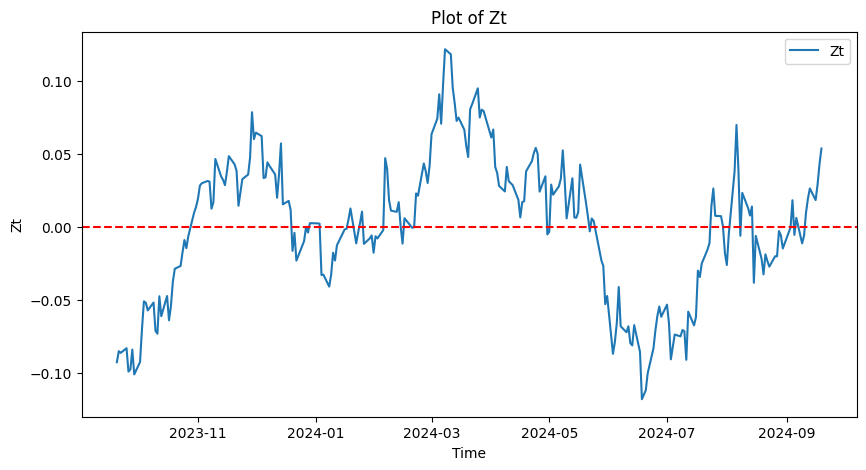

In [17]:
# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(Zt, label="Zt")
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.title("Plot of Zt")
plt.xlabel("Time")
plt.ylabel("Zt")
plt.legend()
plt.show()

In [18]:
# Making a z_score function to calculate the z-scores of the proportion of the Toyota & Subaru prices to each other.
def z_score(series):
    return (series - np.mean(series)) / np.std(series)

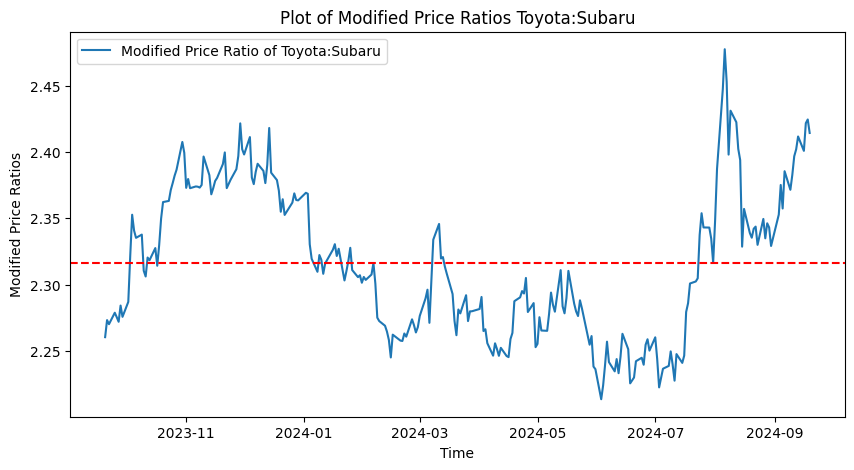

In [19]:
# Get the modified price ratios of Toyota:Subaru.
# Prerequisites normality and a normal distribution are assured due to the taking of the natural log prior.
mod_ratios = tmsub_df['TM'] / tmsub_df['FUJHY']
z_scores = z_score(mod_ratios)

# Plot the modified price ratios.
plt.figure(figsize=(10, 5))
plt.plot(mod_ratios, label="Modified Price Ratio of Toyota:Subaru")
plt.axhline(y=mod_ratios.mean(), color="red", linestyle="--")  # Horizontal line at zero
plt.autoscale(False)
plt.title("Plot of Modified Price Ratios Toyota:Subaru")
plt.xlabel("Time")
plt.ylabel("Modified Price Ratios")
plt.legend()
plt.show()

# Pairs Trading Signal

The pairs trading signal is a flag utilized when the stocks of interest diverge or converge across a specified, preordained threshold which indicates a trading opportunity to take a long or short position. In this scenario, we will exemplify the use of this analytical approach to stock trading by starting with $1,000 in which to utilize every time the pairs trading signal is raised. In doing so, we will track the ensuing profit over the course of year (9/20/2023 - 9/20/2024) in order to determine the merit of utilizing this trading approach over other alternatives.  

In order to simulate real-world financial actions and exemplify how profitable this trade strategy could be, the investment principal at the start of this algorithm is $1,000. Monetary changes will be computed each time the trade signal is raised and we go long or short, or clear positions.


*   Buying Long: Purchase stocks with full ownership with the expectation that the shares will rise in price.
*   Selling Short: Sell stocks without ownership with the expectation that sold stocks can be purchased and then delivered at a lower price than they were sold for, gaining profit.
*   Clear Shares: The process of settling and finalizing transactions, and refraining from further transactions.






In [20]:
# For Machine Learning Implementation:
# Partition the dataset with a ratio of approximately 80:20 to divide the year-long dataframe
# Split the train and test set into 9:3 months, respectively.
#train_df = price_ratios.iloc[:int(0.8*len(price_ratios))]
#test_df = price_ratios.iloc[int(0.8*len(price_ratios)):]

In [21]:
# Create a rolling window within the train set to utilize statistics most applicable and recent to  the timeframe.
# Utilize Panda's rolling() function to provide rolling window calculations.
price_ratios_mavg5 = price_ratios.rolling(window=5, min_periods = 1).mean()
price_ratios_mavg60 = price_ratios.rolling(window=60, min_periods = 1).mean()
price_ratios_std60 = price_ratios.rolling(window=60, min_periods = 1).std()

if price_ratios_std60.isna().iloc[0]:
  price_ratios_std60.iloc[0] = (0)

z_score_60_5 = (price_ratios_mavg5 - price_ratios_mavg60) / price_ratios_std60

if z_score_60_5.isna().iloc[0]:
  z_score_60_5.iloc[0] = (0)



A Pandas DataFrame **profit_tracker** is utilized in this context to track the trading signal flag and the circumstances surrounding its occurrence. Variables tracked include: date, price of each stock at the moment of the trade signal flag, number of shares of each stock purchased/sold, position, profit gained, and overall profit tracked at the moment.

In [22]:
# Make a new Pandas dataframe to track the trade actions taken when the pairs trading signal is raised, and the resultant profit.
profit_tracker = pd.DataFrame(columns=['Date', 'Toyota', 'Subaru', 'Buy_Toyota', 'Buy_Subaru',
                                       'Sell_Toyota', 'Sell_Subaru', 'Position', 'Profit Total', 'Profit Change'])


In [52]:
# Make a function to take action based on the z-score for the days within the window of financial observation.
# stock_1: TM
# stock_2: FUJHY

# Track financial figures such as profit and the number of shares
def trade_action(stock_1, stock_2):
  money = 1000
  count_s1 = 0
  count_s2 = 0
  for i in range(len(price_ratios)):
    if z_score_60_5.iloc[i] < -1.0:
      # Go long
      money -= stock_1[i] * price_ratios.iloc[i] - stock_2[i] * price_ratios.iloc[i]
      count_s1 += price_ratios.iloc[i]
      count_s2 -= price_ratios.iloc[i]

      # Update the profit_tracker dataframe
      profit_tracker.loc[i, 'Date'] = price_ratios.index[i]
      profit_tracker.loc[i, 'Toyota'] = stock_1[i]
      profit_tracker.loc[i, 'Subaru'] = stock_2[i]
      profit_tracker.loc[i, 'Buy_Toyota'] = price_ratios.iloc[i]
      profit_tracker.loc[i, 'Buy_Subaru'] = 0
      profit_tracker.loc[i, 'Sell_Toyota'] = 0
      profit_tracker.loc[i, 'Sell_Subaru'] = price_ratios.iloc[i]
      profit_tracker.loc[i, 'Position'] = 'Long'
      profit_tracker.loc[i, 'Profit Total'] = money
      profit_tracker.loc[i, 'Profit Change'] = money - 1000

    elif z_score_60_5.iloc[i] > 1.0:
      # Go short
      money += stock_1[i] * price_ratios.iloc[i] - stock_2[i] * price_ratios.iloc[i]
      count_s1 -= price_ratios.iloc[i]
      count_s2 += price_ratios.iloc[i]


      # Update the profit_tracker dataframe
      profit_tracker.loc[i, 'Date'] = price_ratios.index[i]
      profit_tracker.loc[i, 'Toyota'] = stock_1[i]
      profit_tracker.loc[i, 'Subaru'] = stock_2[i]
      profit_tracker.loc[i, 'Buy_Toyota'] = 0
      profit_tracker.loc[i, 'Buy_Subaru'] = price_ratios.iloc[i]
      profit_tracker.loc[i, 'Sell_Toyota'] = price_ratios.iloc[i]
      profit_tracker.loc[i, 'Sell_Subaru'] = 0
      profit_tracker.loc[i, 'Position'] = 'Short'
      profit_tracker.loc[i, 'Profit Total'] = money
      profit_tracker.loc[i, 'Profit Change'] = money - 1000

    elif abs(z_score_60_5.iloc[i]) < 0.5:
      # Clear positions
      money += count_s1 * stock_1[i] + stock_2[i] * count_s2
      count_s1 = 0
      count_s2 = 0

      # Update the profit_tracker dataframe
      profit_tracker.loc[i, 'Date'] = price_ratios.index[i]
      profit_tracker.loc[i, 'Toyota'] = stock_1[i]
      profit_tracker.loc[i, 'Subaru'] = stock_2[i]
      profit_tracker.loc[i, 'Buy_Toyota'] = 0
      profit_tracker.loc[i, 'Buy_Subaru'] = 0
      profit_tracker.loc[i, 'Sell_Toyota'] = count_s1
      profit_tracker.loc[i, 'Sell_Subaru'] = count_s2
      profit_tracker.loc[i, 'Position'] = 'Clear'
      profit_tracker.loc[i, 'Profit Total'] = money
      profit_tracker.loc[i, 'Profit Change'] = money - 1000

  return money

In [48]:
print("The total amount: $",trade_action(tmsub_df['TM'].to_numpy(), tmsub_df['FUJHY'].to_numpy()))
print("The total amount of profit: $", profit_tracker['Profit Change'].iloc[-1])

The total amount: $ 1256.3144821447677
The total amount of profit: $ 256.3144821447677


In [49]:
profit_tracker.query('Position == "Short"' or 'Postion == "Long"')
#

,Date,Toyota,Subaru,Buy_Toyota,Buy_Subaru,Sell_Toyota,Sell_Subaru,Position,Profit Total,Profit Change
13,2023-10-09 00:00:00,5.159745,2.207175,0.0,19.155115,19.155115,0.0,Short,1056.556812,56.556812
14,2023-10-10 00:00:00,5.176997,2.24071,0.0,18.845745,18.845745,0.0,Short,1111.893331,111.893331
20,2023-10-18 00:00:00,5.17037,2.219203,0.0,19.128261,19.128261,0.0,Short,1168.34402,168.34402
22,2023-10-20 00:00:00,5.156062,2.182675,0.0,19.558061,19.558061,0.0,Short,1226.497713,226.497713
23,2023-10-23 00:00:00,5.157963,2.182675,0.0,19.595265,19.595265,0.0,Short,1284.799269,284.799269
...,...,...,...,...,...,...,...,...,...,...
223,2024-08-09 00:00:00,5.12747,2.109,0.0,20.459952,20.459952,0.0,Short,1246.728915,246.728915
224,2024-08-12 00:00:00,5.123785,2.11505,0.0,20.261761,20.261761,0.0,Short,1307.691194,307.691194
249,2024-09-17 00:00:00,5.154158,2.128232,0.0,20.613095,20.613095,0.0,Short,1128.045798,128.045798
250,2024-09-18 00:00:00,5.17451,2.134166,0.0,20.912427,20.912427,0.0,Short,1191.626762,191.626762


In [50]:
# Cleaning data for buy and sell signals

# Transform Buy and & Sell signals into 0 & 1
profit_tracker['Buy_Toyota'] = (profit_tracker['Buy_Toyota'] > 0).astype(int)
profit_tracker['Sell_Toyota'] = (profit_tracker['Sell_Toyota'] > 0).astype(int)
profit_tracker['Buy_Subaru'] = (profit_tracker['Buy_Subaru'] > 0).astype(int)
profit_tracker['Sell_Subaru'] = (profit_tracker['Sell_Subaru'] > 0).astype(int)

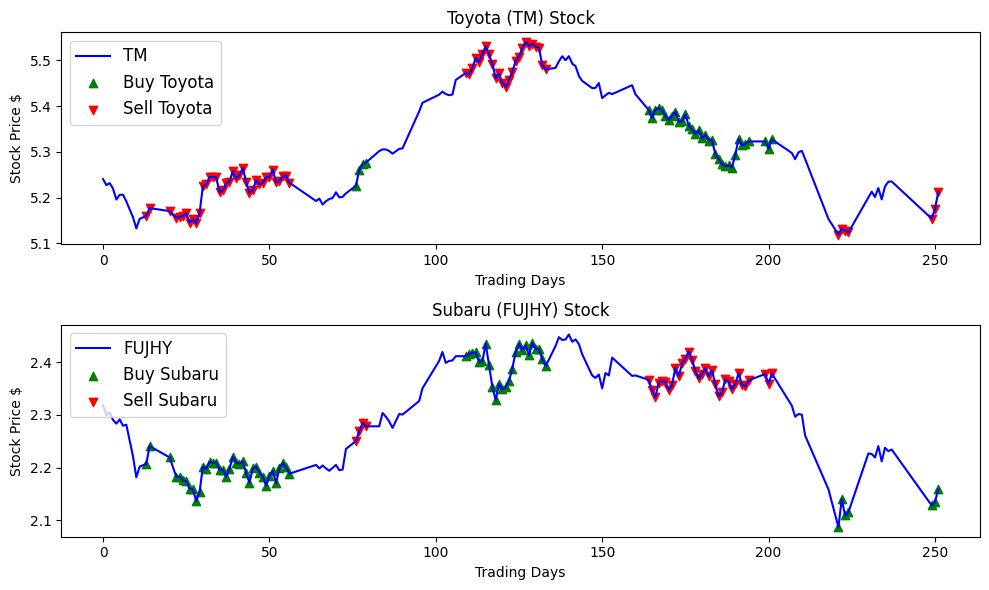

In [51]:
# Making graph
# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(2, 1, figsize = (10, 6))

# Plotting TM (Toyota stock) in the second subplot (row 1)
axs[0].plot(profit_tracker['Toyota'], color = 'blue', label = 'TM')
axs[0].set_title("Toyota (TM) Stock")
axs[0].set_xlabel("Trading Days")
axs[0].set_ylabel("Stock Price $")

# Extract Buy & Sell Subaru signals
buy_tm = profit_tracker[profit_tracker["Buy_Toyota"] == 1].index
sell_tm = profit_tracker[profit_tracker["Sell_Toyota"] == 1].index

buy_sub = profit_tracker[profit_tracker["Buy_Subaru"] == 1].index
sell_sub = profit_tracker[profit_tracker["Sell_Subaru"] == 1].index

# Overlay Buy & Sell signals on Toyota stock price
axs[0].scatter(buy_tm, profit_tracker.loc[buy_tm, 'Toyota'], color='green', marker='^', label='Buy Toyota')
axs[0].scatter(sell_tm, profit_tracker.loc[sell_tm, 'Toyota'], color='red', linestyle='None', marker='v', label='Sell Toyota')


# Update legend for Toyota
axs[0].legend(fontsize=12, loc='upper left')


# Plotting FUJHY (Subaru stock) in the first subplot (row 0)
axs[1].plot(profit_tracker['Subaru'], color='blue', label='FUJHY')
axs[1].set_title("Subaru (FUJHY) Stock")
axs[1].set_xlabel("Trading Days")
axs[1].set_ylabel("Stock Price $")

# Overlay Buy & Sell signals on Subaru stock price
axs[1].scatter(buy_sub, profit_tracker.loc[buy_sub, 'Subaru'], color='green', marker='^', label='Buy Subaru')
axs[1].scatter(sell_sub, profit_tracker.loc[sell_sub, 'Subaru'], color='red', linestyle='None', marker='v', label='Sell Subaru')

# Adding legend to the Subaru subplot
axs[1].legend(fontsize = 12, loc = 'upper left')

# Adjust readability
plt.tight_layout()
plt.show()